In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive"

 AadhaarFraudDetection	       'M.S.Reddy Union Bank Passbook.pdf'
 archive.zip		       'Sravani Aadhaar Card.pdf'
'Colab Notebooks'	        Tecksaksham_OfferLetter.pdf
 GreenSkillAI_OfferLetter.pdf  'The Joy of Computing using Python (1)_copy.pdf'


In [ ]:
!pip install ultralytics opencv-python pillow numpy matplotlib albumentations \
            paddlepaddle paddleocr pytesseract pyzbar pyverhoeff


ERROR: Could not find a version that satisfies the requirement pyverhoeff (from versions: none)
ERROR: No matching distribution found for pyverhoeff


In [ ]:
!ls -R "/content/drive/MyDrive/AadhaarFraudDetection"


Streaming output truncated to the last 5000 lines.
8f682cac-f7f4-47e3-9049-4de650e6ec21-1_jpg.rf.d5ab693ef91467c836b91258d40d6406.txt
8f716fbb-869a-4660-9897-3e1a17434474-1_jpg.rf.0361c81ec1c08181baa79e078bc8595c.txt
8f716fbb-869a-4660-9897-3e1a17434474-1_jpg.rf.06bb50f568663c7b3bd36790ca45fc31.txt
8f716fbb-869a-4660-9897-3e1a17434474-1_jpg.rf.21cd18636f664d34d56560c868a23bc3.txt
8f716fbb-869a-4660-9897-3e1a17434474-1_jpg.rf.25f72bb751d80aef6eb3ec898cc6d58d.txt
8f716fbb-869a-4660-9897-3e1a17434474-1_jpg.rf.3247f0de9f7c4f136b0db6d8ee23d578.txt
8f716fbb-869a-4660-9897-3e1a17434474-1_jpg.rf.4f3cbbbe3d39f1acca1d8d8e36017809.txt
8f716fbb-869a-4660-9897-3e1a17434474-1_jpg.rf.73228afab284f67a0a4f44e0d3c7e2bf.txt
8f716fbb-869a-4660-9897-3e1a17434474-1_jpg.rf.8c7612c333208f4c9abca1e424d047c5.txt
8f716fbb-869a-4660-9897-3e1a17434474-1_jpg.rf.98f35e33227b1bd8fbe87a2d3fbb7fdd.txt
8f716fbb-869a-4660-9897-3e1a17434474-1_jpg.rf.9db96f36ecc47b7b5e891cf04d02cb78.txt
8f716fbb-869a-4660-9897-3e1a17434474

In [ ]:
!pip install ultralytics --upgrade
!pip install paddlepaddle paddleocr pyzbar pyverhoeff
!pip install opencv-python pillow matplotlib albumentations


  Using cached paddlepaddle-3.1.1-cp312-cp312-manylinux1_x86_64.whl.metadata (8.8 kB)
  Using cached paddleocr-3.2.0-py3-none-any.whl.metadata (29 kB)
  Using cached pyzbar-0.1.9-py2.py3-none-any.whl.metadata (10 kB)
ERROR: Could not find a version that satisfies the requirement pyverhoeff (from versions: none)
ERROR: No matching distribution found for pyverhoeff


In [ ]:
import yaml

yaml_path = "/content/drive/MyDrive/AadhaarFraudDetection/data.yaml"

# Overwrite YAML with correct paths
data = {
    'path': '/content/drive/MyDrive/AadhaarFraudDetection',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': ['name_field', 'dob_field', 'gender', 'address_block', 'aadhaar_number', 'photo'] # Standard order including all requested fields
}

with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

!cat /content/drive/MyDrive/AadhaarFraudDetection/data.yaml

names:
- name_field
- dob_field
- gender
- address_block
- aadhaar_number
- photo
path: /content/drive/MyDrive/AadhaarFraudDetection
test: test/images
train: train/images
val: valid/images


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # nano model

model.train(
    data="/content/drive/MyDrive/AadhaarFraudDetection/data.yaml",
    epochs=5,          # ⏳ quick training
    patience=3,        # stop early if no improvement
    imgsz=416,         # smaller image size for speed
    batch=16,
    device='cpu'
)


Ultralytics 8.3.195 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/AadhaarFraudDetection/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=3, perspective=0.0, plots=T

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b7d546b9850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [ ]:
!cp /content/runs/detect/train2/weights/best.pt /content/drive/MyDrive/AadhaarFraudDetection/
!cp /content/runs/detect/train2/weights/last.pt /content/drive/MyDrive/AadhaarFraudDetection/

In [ ]:
!cp -r /content/runs/detect/train2/weights /content/drive/MyDrive/AadhaarFraudDetection/


image 1/722 /content/drive/MyDrive/AadhaarFraudDetection/test/images/01147347510019_jpg.rf.f18314bed494cc59b14ed8f2d651da83.jpg: 416x416 1 name_field, 1 dob_field, 1 gender, 1 address_block, 99.7ms
image 2/722 /content/drive/MyDrive/AadhaarFraudDetection/test/images/01213254430016_jpg.rf.3a08d33bdfd7f264c433c909c124f3ac.jpg: 416x416 1 name_field, 1 aadhaar_number, 98.5ms
image 3/722 /content/drive/MyDrive/AadhaarFraudDetection/test/images/01213254430016_jpg.rf.54fb95a253f658b9e348d44105cdaeca.jpg: 416x416 1 name_field, 1 aadhaar_number, 100.4ms
image 4/722 /content/drive/MyDrive/AadhaarFraudDetection/test/images/01213254430016_jpg.rf.86aac4e637613a03d50cdd57d8c303e7.jpg: 416x416 1 name_field, 1 aadhaar_number, 100.6ms
image 5/722 /content/drive/MyDrive/AadhaarFraudDetection/test/images/01213254430016_jpg.rf.cac96b516131410a11bf9da1088f8cb8.jpg: 416x416 1 name_field, 2 aadhaar_numbers, 96.3ms
image 6/722 /content/drive/MyDrive/AadhaarFraudDetection/test/images/01246715420015_jpg.rf.62b

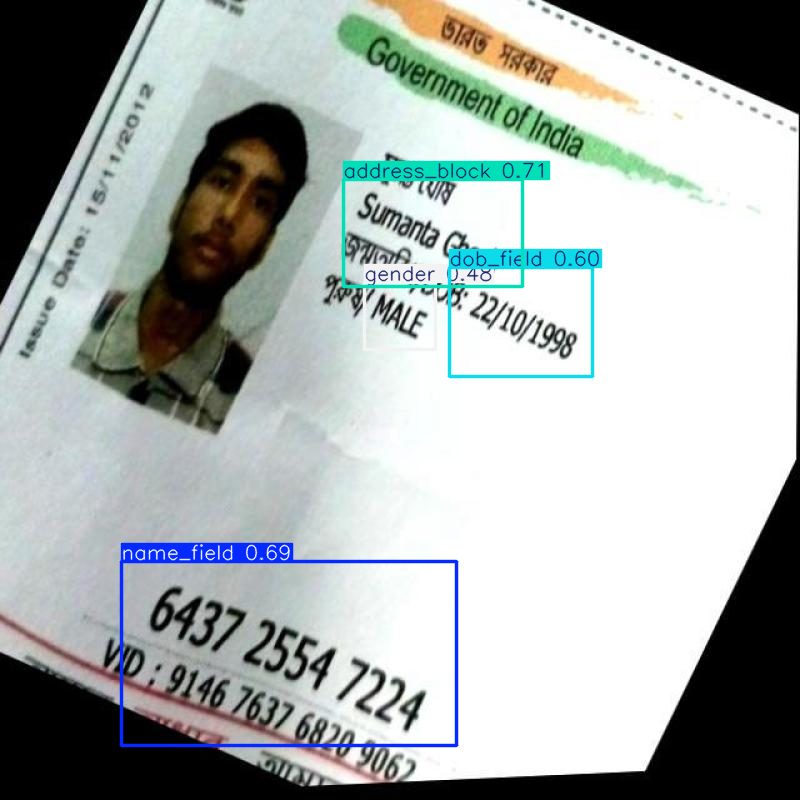

In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Run detection on test images
results = model.predict("/content/drive/MyDrive/AadhaarFraudDetection/test/images", conf=0.25)

# Show first prediction
results[0].show()

In [ ]:
!pip install paddleocr paddlepaddle -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.5/187.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7

In [ ]:
!pip install paddleocr paddlepaddle==2.6.1 -q
!pip install pyzbar pyverhoeff opencv-python pillow matplotlib albumentations -q

In [ ]:
!apt-get install -y libzbar0
!pip install pyzbar -q


In [ ]:
!pip uninstall -y paddleocr paddlepaddle
!pip install paddlepaddle==2.5.2 paddleocr==2.7.0.3 -q


In [ ]:
!pip uninstall -y paddleocr paddlepaddle
!pip install paddlepaddle==2.5.2 paddleocr==2.7.0.3 -q
!apt-get install -y libzbar0
!pip install pyzbar opencv-python pillow -q


In [ ]:
!pip uninstall -y paddleocr paddlepaddle paddlex
!pip install paddlepaddle==2.5.2 paddleocr==2.7.0.3 -q


In [ ]:
!pip uninstall -y paddlex


In [ ]:
!pip uninstall -y paddleocr paddlepaddle
!pip install paddlepaddle==2.5.2 paddleocr==2.7.0.3 -q


In [ ]:
# Remove any conflicting installs
!pip uninstall -y paddleocr paddlepaddle paddlex

# Install a compatible paddlepaddle version and paddleocr
# Removed pyverhoeff as it seems un-installable in this environment.
!pip install paddlepaddle paddleocr==2.7.0.3 -q

# System lib for QR code decoding (removed as requested)
# !apt-get install -y libzbar0

# Extra libs for image/QR/OCR (removed pyzbar)
!pip install opencv-python pillow matplotlib albumentations pytesseract -q

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for PyMuPDF
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (PyMuPDF)


In [ ]:
!apt-get install -y tesseract-ocr
!pip install pytesseract -q
!apt-get install -y libzbar0
!pip install pyzbar opencv-python pillow -q


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
# 📌 Aadhaar Fraud Detection with YOLOv8 + Tesseract OCR + QR Code
# ---------------------------------------------------------------

import cv2, os, re, yaml
import pytesseract
from pyzbar.pyzbar import decode
from PIL import Image
from ultralytics import YOLO

# =============================
# 1. Load trained YOLOv8 model
# =============================
model = YOLO("/content/runs/detect/train2/weights/best.pt")  # adjust if needed

# =============================
# 2. Class map (must match data.yaml order)
# =============================
CLASS_MAP = {
    0: 'name_field',
    1: 'dob_field',
    2: 'gender',
    3: 'address_block',
    4: 'aadhaar_number',
    5: 'photo'
}

# =============================
# 3. Aadhaar Number Validation (Verhoeff checksum)
# =============================
verhoeff_table_d = [
    [0,1,2,3,4,5,6,7,8,9],
    [1,2,3,4,0,6,7,8,9,5],
    [2,3,4,0,1,7,8,9,5,6],
    [3,4,0,1,2,8,9,5,6,7],
    [4,0,1,2,3,9,5,6,7,8],
    [5,9,8,7,6,0,4,3,2,1],
    [6,5,9,8,7,1,0,4,3,2],
    [7,6,5,9,8,2,1,0,4,3],
    [8,7,6,5,9,3,2,1,0,4],
    [9,8,7,6,5,4,3,2,1,0]
]

verhoeff_table_p = [
    [0,1,2,3,4,5,6,7,8,9],
    [1,5,7,6,2,8,3,0,9,4],
    [5,8,0,3,7,9,6,1,4,2],
    [8,9,1,6,0,4,3,5,2,7],
    [9,4,5,3,1,2,6,8,7,0],
    [4,2,8,6,5,7,9,3,0,1],
    [2,7,9,3,8,0,4,6,1,5],
    [7,0,4,6,9,1,3,2,5,8]
]

def validate_aadhaar(num: str) -> bool:
    """Validate Aadhaar number using Verhoeff checksum"""
    if not re.match(r"^\d{12}$", num):
        return False
    c = 0
    for i, item in enumerate(reversed(num)):
        c = verhoeff_table_d[c][verhoeff_table_p[(i+1)%8][int(item)]]
    return c == 0

# =============================
# 4. Process Aadhaar Image
# =============================
def process_image(img_path, save_photo_dir="/content/drive/MyDrive/AadhaarFraudDetection/output"):
    img = cv2.imread(img_path)
    results = model(img)[0]
    detected_data = {}

    # Ensure output folder exists
    os.makedirs(save_photo_dir, exist_ok=True)

    for box in results.boxes:
        cls_id = int(box.cls)
        label = CLASS_MAP.get(cls_id, "unknown")
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]

        if label in ["aadhaar_number", "name_field", "dob_field", "gender", "address_block"]:
            # OCR extraction
            text = pytesseract.image_to_string(crop, config="--psm 6")
            text = text.strip()
            detected_data[label] = text

        elif label == "photo":
            # Save cropped photo
            photo_path = os.path.join(save_photo_dir, f"{os.path.basename(img_path)}_photo.jpg")
            cv2.imwrite(photo_path, crop)
            detected_data["photo_saved_at"] = photo_path

    # Aadhaar number validation
    if "aadhaar_number" in detected_data:
        digits = re.sub(r"\D", "", detected_data["aadhaar_number"])  # keep only numbers
        valid = validate_aadhaar(digits)
        detected_data["aadhaar_number"] = digits
        detected_data["aadhaar_valid"] = valid

    # QR Code decoding (optional: detect directly from full image)
    decoded_qr = decode(Image.open(img_path))
    if decoded_qr:
        detected_data["qr_code"] = decoded_qr[0].data.decode("utf-8")

    return detected_data

# =============================
# 5. Run on a test Aadhaar image
# =============================
test_img = "/content/drive/MyDrive/AadhaarFraudDetection/test/images/01147347510019_jpg.rf.f18314bed494cc59b14ed8f2d651da83.jpg"
output = process_image(test_img)

print("🔎 Detection Results:")
for k, v in output.items():
    print(f"{k}: {v}")



0: 416x416 1 name_field, 1 dob_field, 1 gender, 1 address_block, 174.9ms
Speed: 3.7ms preprocess, 174.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
🔎 Detection Results:
address_block: sy
name_field: 6477
; 34
Sth 4 7224
dob_field: oy ie
gender: Mug


In [ ]:
!apt-get install -y tesseract-ocr libzbar0
!pip install pytesseract pyzbar opencv-python pillow -q


In [ ]:
!apt-get install -y tesseract-ocr
!pip install pytesseract -q


In [ ]:
# Install the Tesseract OCR engine (needed for text extraction)
!apt-get install -y tesseract-ocr

# Install the Python wrapper for Tesseract
!pip install pytesseract -q


In [ ]:
import pytesseract
print("✅ pytesseract installed successfully, version:", pytesseract.get_tesseract_version())


In [ ]:
# System dependency for QR decoding
!apt-get install -y libzbar0

# Python package for QR code decoding
!pip install pyzbar -q


In [ ]:
from pyzbar.pyzbar import decode
print("✅ pyzbar imported successfully!")


In [ ]:
!pip install ultralytics -q


In [ ]:
from ultralytics import YOLO
print("✅ Ultralytics YOLO imported successfully!")


In [ ]:
!find /content/drive/MyDrive/ -name "*.pt"


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # tiny YOLO model
model.train(data="/content/drive/MyDrive/AadhaarFraudDetection/data.yaml",
            epochs=3,
            imgsz=416,
            name="aadhaar_demo")


In [ ]:
# 📌 Aadhaar Fraud Detection with YOLOv8 + Tesseract OCR + Fraud Rules
# ------------------------------------------------------------------

import cv2, os, re
import pytesseract
from PIL import Image
from ultralytics import YOLO

# 1. Load trained YOLOv8 model
model = YOLO("/content/runs/detect/train2/weights/best.pt")  # update path if needed

# 2. Class map (must match data.yaml)
CLASS_MAP = {
    0: 'name_field',
    1: 'dob_field',
    2: 'gender',
    3: 'address_block',
    4: 'aadhaar_number',
    5: 'photo'
}

# 3. Aadhaar Number Validation (Verhoeff checksum)
verhoeff_table_d = [
    [0,1,2,3,4,5,6,7,8,9],
    [1,2,3,4,0,6,7,8,9,5],
    [2,3,4,0,1,7,8,9,5,6],
    [3,4,0,1,2,8,9,5,6,7],
    [4,0,1,2,3,9,5,6,7,8],
    [5,9,8,7,6,0,4,3,2,1],
    [6,5,9,8,7,1,0,4,3,2],
    [7,6,5,9,8,2,1,0,4,3],
    [8,7,6,5,9,3,2,1,0,4],
    [9,8,7,6,5,4,3,2,1,0]
]
verhoeff_table_p = [
    [0,1,2,3,4,5,6,7,8,9],
    [1,5,7,6,2,8,3,0,9,4],
    [5,8,0,3,7,9,6,1,4,2],
    [8,9,1,6,0,4,3,5,2,7],
    [9,4,5,3,1,2,6,8,7,0],
    [4,2,8,6,5,7,9,3,0,1],
    [2,7,9,3,8,0,4,6,1,5],
    [7,0,4,6,9,1,3,2,5,8]
]

def validate_aadhaar(num: str) -> bool:
    """Validate Aadhaar number using Verhoeff checksum"""
    if not re.match(r"^\d{12}$", num):
        return False
    c = 0
    for i, item in enumerate(reversed(num)):
        c = verhoeff_table_d[c][verhoeff_table_p[(i+1)%8][int(item)]]
    return c == 0

# 4. Process Aadhaar Image
def process_image(img_path, save_photo_dir="/content/drive/MyDrive/AadhaarFraudDetection/output"):
    img = cv2.imread(img_path)
    results = model(img)[0]
    detected_data = {}

    os.makedirs(save_photo_dir, exist_ok=True)

    for box in results.boxes:
        cls_id = int(box.cls)
        label = CLASS_MAP.get(cls_id, "unknown")
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        crop = img[y1:y2, x1:x2]

        if label in ["aadhaar_number", "name_field", "dob_field", "gender", "address_block"]:
            text = pytesseract.image_to_string(crop, config="--psm 6")
            text = text.strip()
            detected_data[label] = text

        elif label == "photo":
            photo_path = os.path.join(save_photo_dir, f"{os.path.basename(img_path)}_photo.jpg")
            cv2.imwrite(photo_path, crop)
            detected_data["photo_saved_at"] = photo_path

    # =============================
    # Apply Fraud Rules with Display Values
    # =============================
    results_display = {}

    # Aadhaar Number
    aadhaar_raw = detected_data.get("aadhaar_number", "")
    digits = re.sub(r"\D", "", aadhaar_raw)
    valid_aadhaar = validate_aadhaar(digits)
    results_display["aadhaar_number"] = f"{digits} | {'Valid' if valid_aadhaar else 'Invalid'}"

    # Name check
    name_val = detected_data.get("name_field", "")
    valid_name = bool(name_val and not name_val.isdigit())
    results_display["name_field"] = f"{name_val} | {'Valid' if valid_name else 'Invalid'}"

    # DOB check
    dob_val = detected_data.get("dob_field", "")
    dob_pattern = r"^\d{2}/\d{2}/\d{4}$|^\d{4}-\d{2}-\d{2}$"
    valid_dob = bool(re.match(dob_pattern, dob_val))
    results_display["dob_field"] = f"{dob_val} | {'Valid' if valid_dob else 'Invalid'}"

    # Gender check
    gender_val = detected_data.get("gender", "").lower()
    valid_gender = gender_val in ["male", "female"]
    results_display["gender"] = f"{gender_val} | {'Valid' if valid_gender else 'Invalid'}"

    # Address check
    address_val = detected_data.get("address_block", "")
    valid_address = bool(address_val)
    results_display["address_block"] = f"{address_val} | {'Valid' if valid_address else 'Invalid'}"

    # Photo check
    photo_val = detected_data.get("photo_saved_at", "")
    valid_photo = bool(photo_val)
    results_display["photo"] = f"{photo_val if photo_val else ''} | {'Valid' if valid_photo else 'Invalid'}"

    return results_display

# 5. Run on a test Aadhaar image
test_img = "/content/drive/MyDrive/AadhaarFraudDetection/test/images/01147347510019_jpg.rf.f18314bed494cc59b14ed8f2d651da83.jpg"
results = process_image(test_img)

print("🔎 Aadhaar Fraud Check Results:")
for field, result in results.items():
    print(f"{field}: {result}")




0: 416x416 1 name_field, 1 dob_field, 1 gender, 1 address_block, 115.3ms
Speed: 2.3ms preprocess, 115.3ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
🔎 Aadhaar Fraud Check Results:
aadhaar_number:  | Invalid
name_field: 6477
; 34
Sth 4 7224 | Valid
dob_field: oy ie | Invalid
gender: mug | Invalid
address_block: sy | Valid
photo:  | Invalid


In [ ]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.2 MB/s eta 0:00:00
